In [1]:
import pandas as pd 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
%matplotlib inline

In [2]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [5]:
myphone = pd.read_csv("myphonedata.csv")
myphone

,V1,V2,V3,red,white,green,yellow,orange,blue
0,red,white,green,1,1,1,0,0,0
1,white,orange,NaN,0,1,0,0,1,0
2,white,blue,NaN,0,1,0,0,0,1
3,red,white,orange,1,1,0,0,1,0
4,red,blue,NaN,1,0,0,0,0,1
5,white,blue,NaN,0,1,0,0,0,1
6,red,blue,NaN,1,0,0,0,0,1
7,red,white,blue,1,1,0,0,0,1
8,green,NaN,NaN,0,0,1,0,0,0
9,red,white,blue,1,1,0,0,0,1


In [6]:
myphone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   V1      11 non-null     object
 1   V2      9 non-null      object
 2   V3      4 non-null      object
 3   red     11 non-null     int64 
 4   white   11 non-null     int64 
 5   green   11 non-null     int64 
 6   yellow  11 non-null     int64 
 7   orange  11 non-null     int64 
 8   blue    11 non-null     int64 
dtypes: int64(6), object(3)
memory usage: 920.0+ bytes


In [8]:
categorical_features= [feature for feature in myphone.columns if  myphone[feature].dtypes=='O']
categorical_features

['V1', 'V2', 'V3']

In [9]:
numerical_features = [feature for feature in myphone.columns if myphone[feature].dtypes != 'O'] # list comprehension feature that are not equal to object type

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
myphone[numerical_features].head()

Number of numerical variables:  6


,red,white,green,yellow,orange,blue
0,1,1,1,0,0,0
1,0,1,0,0,1,0
2,0,1,0,0,0,1
3,1,1,0,0,1,0
4,1,0,0,0,0,1


In [10]:
Y = myphone[numerical_features]
X = myphone[categorical_features]

In [11]:
categorical_features

['V1', 'V2', 'V3']

In [12]:
V1 = pd.get_dummies(myphone["V1"])
V2 = pd.get_dummies(myphone["V2"])
V3 = pd.get_dummies(myphone["V3"])

In [13]:
new_myphone = pd.concat([V1,V2,V3, Y], axis =1)
new_myphone

,green,red,white,yellow,blue,orange,white,blue,green,orange,red,white,green,yellow,orange,blue
0,0,1,0,0,0,0,1,0,1,0,1,1,1,0,0,0
1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1
3,0,1,0,0,0,0,1,0,0,1,1,1,0,0,1,0
4,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1
5,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1
6,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1
7,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1
8,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1


In [14]:
frequent_itemsets = apriori(new_myphone , min_support = 0.0075, max_len = 4, use_colnames = True)  #how we decided min support ?
frequent_itemsets

,support,itemsets
0,0.090909,(green)
1,0.545455,(red)
2,0.272727,(white)
3,0.090909,(yellow)
4,0.363636,(blue)
...,...,...
166,0.090909,"(orange, white, red)"
167,0.181818,"(blue, white, red)"
168,0.181818,"(blue, white, red)"
169,0.090909,"(green, white, red)"


In [15]:
# Most Frequent item sets based on support 
frequent_itemsets.sort_values('support', ascending = False, inplace = True)
frequent_itemsets

,support,itemsets
11,0.636364,(white)
1,0.545455,(red)
10,0.545455,(red)
22,0.545455,(red)
15,0.545455,(blue)
...,...,...
75,0.090909,"(green, red)"
70,0.090909,"(orange, white, red)"
69,0.090909,"(green, white, red)"
66,0.090909,"(orange, white, red)"


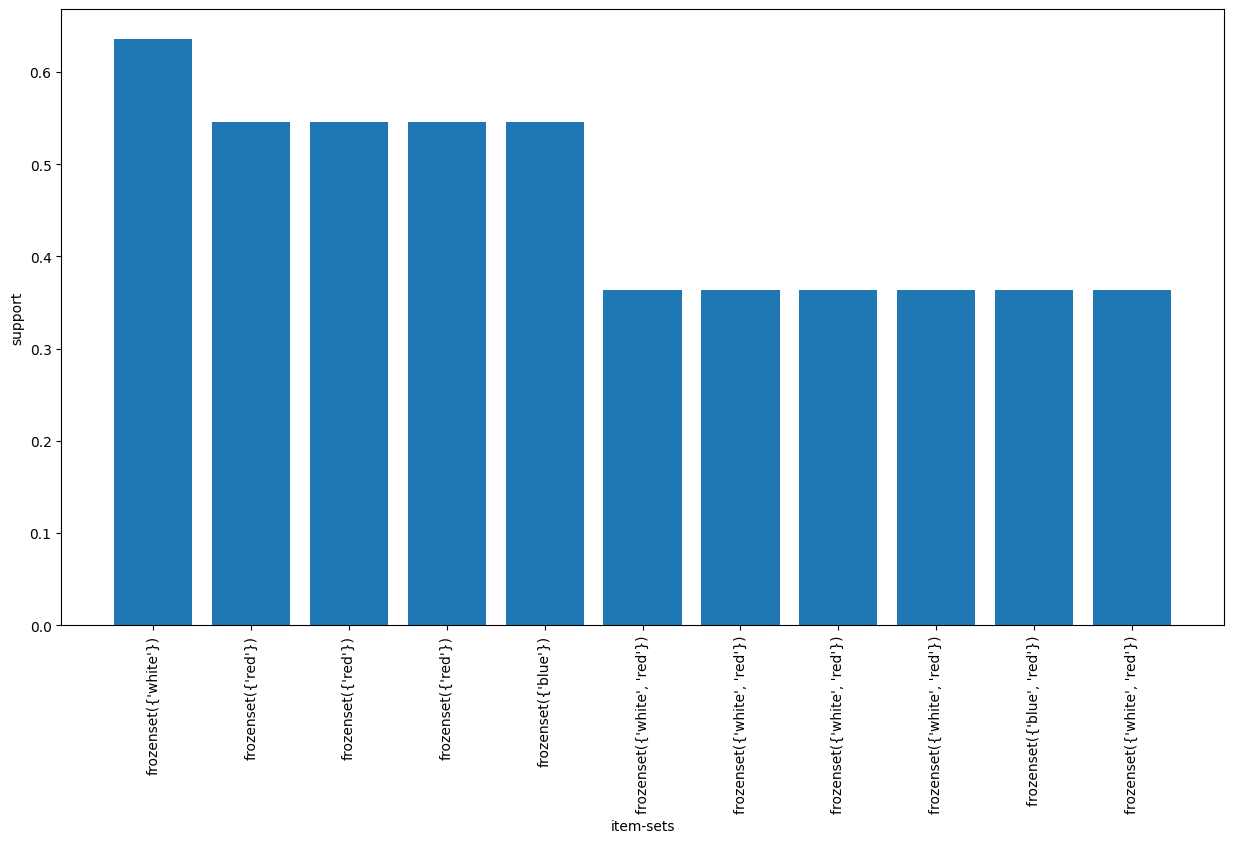

In [18]:
plt.figure(figsize =(15,8))

plt.bar(x = list(range(0, 11)), height = frequent_itemsets.support[0:11])
plt.xticks(list(range(0, 11)), frequent_itemsets.itemsets[0:11], rotation=90)
plt.xlabel('item-sets')
plt.ylabel('support')
plt.show()

In [19]:
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)
rules.head(20)
rules.sort_values('lift', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(white),(green),0.272727,0.090909,0.090909,0.333333,3.666667,0.066116,1.363636
28,(green),(white),0.090909,0.272727,0.090909,1.000000,3.666667,0.066116,inf
4,(blue),(white),0.181818,0.272727,0.181818,1.000000,3.666667,0.132231,inf
5,(white),(blue),0.272727,0.181818,0.181818,0.666667,3.666667,0.132231,2.454545
26,(white),"(orange, red)",0.272727,0.090909,0.090909,0.333333,3.666667,0.066116,1.363636
7,"(blue, red)",(white),0.181818,0.272727,0.181818,1.000000,3.666667,0.132231,inf
23,"(orange, red)",(white),0.090909,0.272727,0.090909,1.000000,3.666667,0.066116,inf
18,(white),"(green, red)",0.272727,0.090909,0.090909,0.333333,3.666667,0.066116,1.363636
10,(white),"(blue, red)",0.272727,0.181818,0.181818,0.666667,3.666667,0.132231,2.454545
15,"(green, red)",(white),0.090909,0.272727,0.090909,1.000000,3.666667,0.066116,inf


In [20]:
def to_list(i):
    return (sorted(list(i)))

ma_X = rules.antecedents.apply(to_list) + rules.consequents.apply(to_list)
ma_X

0             [white, red]
1             [red, white]
2              [blue, red]
3              [red, blue]
4            [blue, white]
5            [white, blue]
6       [blue, white, red]
7       [blue, red, white]
8       [red, white, blue]
9       [blue, red, white]
10      [white, blue, red]
11      [red, blue, white]
12         [orange, white]
13         [white, orange]
14     [green, white, red]
15     [green, red, white]
16     [red, white, green]
17     [green, red, white]
18     [white, green, red]
19     [red, green, white]
20           [orange, red]
21           [red, orange]
22    [orange, white, red]
23    [orange, red, white]
24    [red, white, orange]
25    [orange, red, white]
26    [white, orange, red]
27    [red, orange, white]
28          [green, white]
29          [white, green]
30            [green, red]
31            [red, green]
dtype: object

In [21]:
ma_X = ma_X.apply(sorted)
ma_X 

0             [red, white]
1             [red, white]
2              [blue, red]
3              [blue, red]
4            [blue, white]
5            [blue, white]
6       [blue, red, white]
7       [blue, red, white]
8       [blue, red, white]
9       [blue, red, white]
10      [blue, red, white]
11      [blue, red, white]
12         [orange, white]
13         [orange, white]
14     [green, red, white]
15     [green, red, white]
16     [green, red, white]
17     [green, red, white]
18     [green, red, white]
19     [green, red, white]
20           [orange, red]
21           [orange, red]
22    [orange, red, white]
23    [orange, red, white]
24    [orange, red, white]
25    [orange, red, white]
26    [orange, red, white]
27    [orange, red, white]
28          [green, white]
29          [green, white]
30            [green, red]
31            [green, red]
dtype: object

In [22]:
rules_sets = list(ma_X) # it gives list out of groceries dataset

unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)] #nested list

In [23]:
index_rules = []
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))
    
## it sets index but in random 

In [24]:
# getting rules without any redudancy 
rules_no_redudancy = rules.iloc[index_rules, :]
rules_no_redudancy

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,"(blue, white)",(red),0.181818,0.545455,0.181818,1.000000,1.833333,0.082645,inf
0,(white),(red),0.272727,0.545455,0.363636,1.333333,2.444444,0.214876,inf
14,"(green, white)",(red),0.090909,0.545455,0.090909,1.000000,1.833333,0.041322,inf
4,(blue),(white),0.181818,0.272727,0.181818,1.000000,3.666667,0.132231,inf
12,(orange),(white),0.090909,0.272727,0.090909,1.000000,3.666667,0.066116,inf
2,(blue),(red),0.181818,0.545455,0.181818,1.000000,1.833333,0.082645,inf
20,(orange),(red),0.090909,0.545455,0.090909,1.000000,1.833333,0.041322,inf
28,(green),(white),0.090909,0.272727,0.090909,1.000000,3.666667,0.066116,inf
30,(green),(red),0.090909,0.545455,0.090909,1.000000,1.833333,0.041322,inf
22,"(orange, white)",(red),0.090909,0.545455,0.090909,1.000000,1.833333,0.041322,inf


In [25]:
# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy.sort_values('lift', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(blue),(white),0.181818,0.272727,0.181818,1.000000,3.666667,0.132231,inf
12,(orange),(white),0.090909,0.272727,0.090909,1.000000,3.666667,0.066116,inf
28,(green),(white),0.090909,0.272727,0.090909,1.000000,3.666667,0.066116,inf
0,(white),(red),0.272727,0.545455,0.363636,1.333333,2.444444,0.214876,inf
6,"(blue, white)",(red),0.181818,0.545455,0.181818,1.000000,1.833333,0.082645,inf
14,"(green, white)",(red),0.090909,0.545455,0.090909,1.000000,1.833333,0.041322,inf
2,(blue),(red),0.181818,0.545455,0.181818,1.000000,1.833333,0.082645,inf
20,(orange),(red),0.090909,0.545455,0.090909,1.000000,1.833333,0.041322,inf
30,(green),(red),0.090909,0.545455,0.090909,1.000000,1.833333,0.041322,inf
22,"(orange, white)",(red),0.090909,0.545455,0.090909,1.000000,1.833333,0.041322,inf
